# t-SNE for data visualisation

## Algorithm and practical applications

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
from numpy import linspace,pi,cos,sin
from pylab import scatter,subplot,cm,show
from numpy import abs


### Why low-dimensional data visualisation?

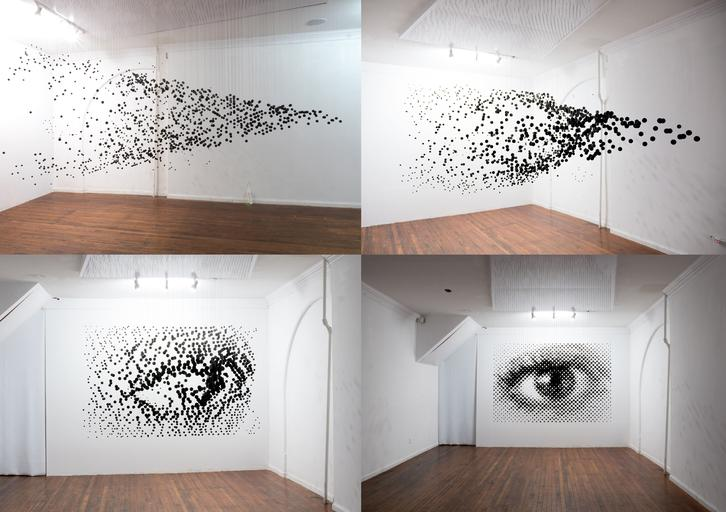

Unravel latent data structures on high dimensional and complex datasets


Most real world datasets are complex and based on more than two or three features, which makes it impossible to visualise all dimensions in a 2 or 3 dimensional plane. Therefore, one needs to implement dimensionality reduction techniques to obtain a visually comprehensive reconstruction of the data. 

Sometimes, even with lower dimensional data, the sample distribution on a specific space - or perspective - gives us a wrong or misleading idea on the data we are aiming to analyse. Therefore, it is very important to select the right algorithm for dimensionality reduction and data visualisation; while also being aware of its drawbacks and limitations. 

## Aims of this session

* **Motivate** dimensionality reduction for data visualisation and t-SNE.
* Describe how t-SNE **algorithm** works and the intuition behind it.
* **Demonstrate** how to run t-SNE and **interpret** its outputs.
* Provide several **examples** and highlight its limitations.

### What is t-SNE?

* t-Distributed Stochastic Neighbour Embedding (t-SNE) is a **nonlinear dimensionality reduction** method
* It reduces the data dimensionality to 2 or 3 dimensions for **visualisation**
* It implements a craftily designed loss function which **preserves local neighbourhood distances** between data points

In [ ]:
def run_tsne_circles(n_samples, n_components):
    #n_samples = 300
    #n_components = 2
    #(fig, subplots) = plt.subplots(1, 5, figsize=(15, 8))
    (fig, subplots) = plt.subplots(1, 5, figsize=(30, 10))
    perplexities = [5, 30, 50, 100]

    X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

    red = y == 0
    green = y == 1

    #ax = subplots[0][0]
    ax = subplots[0]
    ax.set_title("Original", fontsize=30)
    ax.scatter(X[red, 0], X[red, 1], c="orange")
    ax.scatter(X[green, 0], X[green, 1], c="royalblue")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    #plt.axis('tight')
    ax.axis('off')

    for i, perplexity in enumerate(perplexities):
        #ax = subplots[0][i + 1]
        ax = subplots[i + 1]

        t0 = time()
        tsne = manifold.TSNE(n_components=n_components, init='random',
                             random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(X)
        t1 = time()
        #print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
        ax.set_title("Perplexity=%d" % perplexity, fontsize=30)
        ax.scatter(Y[red, 0], Y[red, 1], c="orange")
        ax.scatter(Y[green, 0], Y[green, 1], c="royalblue")
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('off')
        #ax.axis('tight')

    plt.show()

### t-SNE example: Concentric circles

In [ ]:
run_tsne_circles(n_samples=300, n_components=2)

In the original space, the samples are often distributed following certain patterns or structures. Their distances and the formation of clusters give an idea of their relations and similarities.

For this reason, it is important that any transformation, such as dimensionality reduction, preserves these properties. In this simulation we can observe how the right choice of t-SNE hyper-parameters is able to transform the original dimensions to a new visualisation that captures the original structure. We will see later when and how to select hyper-parameters. 

### t-SNE example: S curve

In [ ]:
def run_s_curve(n_samples, n_components):
    # Another example using s-curve
    X, color = datasets.make_s_curve(n_samples, random_state=0)
    (fig, subplots) = plt.subplots(1, 5, figsize=(30, 10))
    perplexities = [5, 30, 50, 100]

    ax = subplots[0]
    ax.set_title("Original", fontsize=30)
    ax.scatter(X[:, 0], X[:, 2], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())

    for i, perplexity in enumerate(perplexities):
        ax = subplots[i + 1]

        t0 = time()
        tsne = manifold.TSNE(n_components=n_components, init='random',
                             random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(X)
        t1 = time()

        ax.set_title("Perplexity=%d" % perplexity, fontsize=30)
        ax.scatter(Y[:, 0], Y[:, 1], c=color)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')

    plt.show()

In [ ]:
run_s_curve(n_samples=300, n_components=2)

In this second example, the samples are distributed along an S curve.

The t-SNE transformation into a two dimensional visualisation provides a new perspective on the data structure, representing  the underlying topology of the data in terms of its local neighbourhood.

In the case of the S curve, the points lie in a single 1D curve, which is what the t-SNE recovers.

### Preserving local neighbourhoods

* t-SNE prioritises to **preserve pairwise local distances**, instead of preserving information over the whole dimensions as PCA does. 

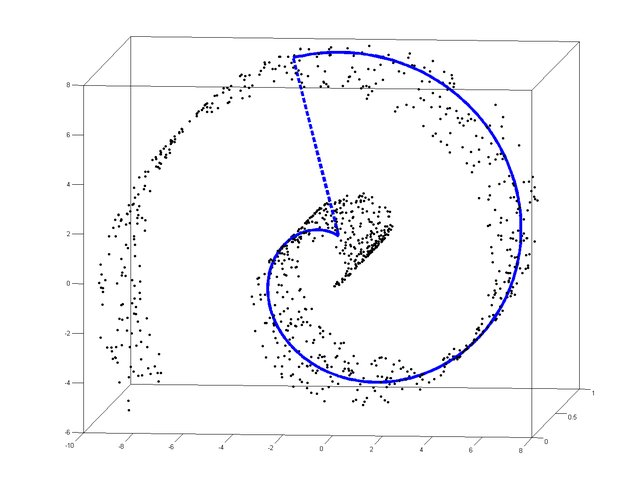

In this example, similar to the S curve, we can see how local (continuous line) vs global or long range distances (dashed line) operate. When the data is distributed over complex manifolds, looking at global distances can sometimes lose the global topology after the transformation.

t-SNE is only based on a selected subset of local distances, which is controlled by certain hyper-parameters, and therefore it is possible to visualise the data in 2D while preserving its properties, even when dealing with complex geometries. 

### Nonlinear manifolds 

* Nonlinear data structures are common in high-dimensional datasets, laying on curved manifolds
* Nonlinear geometric shapes include cylinders, bars, curves, ...

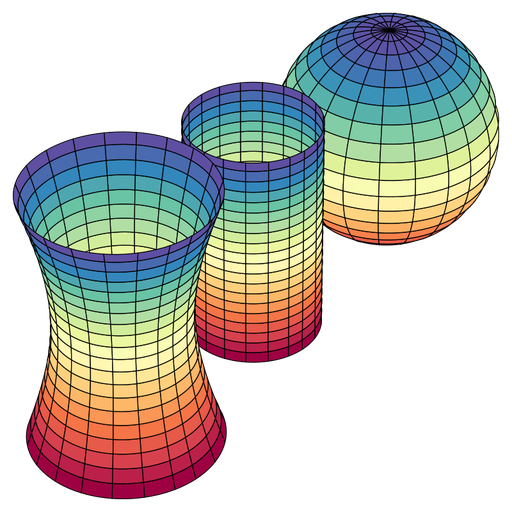



### What makes t-SNE unique?

* Unlike PCA, it is a **nonlinear projection**. 
* It uses the **local distances** between points to create a low-dimensional mapping.
* **Preserves the topology** of the data manifold
* It models local distances as sampled from a **probability distribution**.


### How does t-SNE work? 

* It defines Gaussian distributions centred in each data point for the location of neighbours.

* The variance of the distribution is tuned by the **perplexity** parameter, which determines the **number of neighbour data points** considered as local neighbours. 

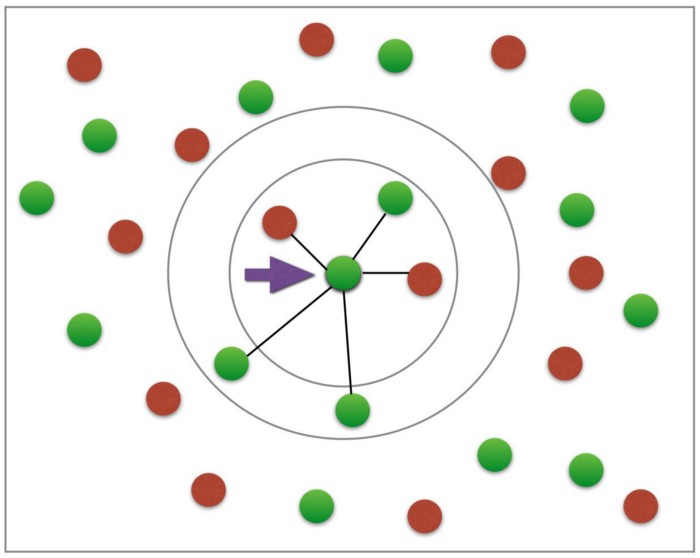

### t-SNE algorithm

* **Step 1**: Compute the distance probability between all pairs of neighbouring points in the original high-dimensional space
* **Step 2**: Follow the same procedure in the low-dimensional space
* **Step 3**: Compute and minimize the difference between the high-dimensional and the low-dimensional distributions

Now we will go through each step of the algorithm. We will define distributions for the distances in the high and low dimensional spaces for neighbour points, and then minimize the difference between high and low dimensional representations.

### Step 1: Probabilities in the high-dimensional space

* For each pair of points it computes the conditional probability $ p_{j|i} $:

$$ p_{j|i} = \frac{\mbox{distance between i and j}}{\mbox{sum of all distances among the k-nearest neighbours of i}} = \frac{exp(-d(x_{i},x_{j})/(2\sigma^{2}_{i}))}{\sum_{i \neq k} exp(-d(x_{i},x_{k})/(2\sigma^{2}_{i}))} $$

* The conditional probability is high for points near each other, while those further away have lower conditional probabilities. 


For the k-nearest neighbours all considered, we measure the relative distance for all samples in the original space. 
Then use them to generate conditional probability distributions, and finally the joint ones. 

### Step 1: Probabilities in the high-dimensional space

* Which are then used to generate symmetric joint probabilities between points $i$ and $j$:

$$ p_{j,i} = \frac{p_{j|i} + p_{i|j}}{2N} $$


### Step 2: Approximated probabilities in the new low-dimensional regime

* In the new **low-dimensional space**, t-SNE uses the **Student t-distribution** (instead of the Gaussian distribution) to model the local distance conditional probabilities: 

$$ q_{j|i} = \frac{\mbox{difference between probabilities of i and j}}{\mbox{sum of all differences among the k-nearest neighbours of i}} = \frac{(1+||y_{i} - y_{j}||^{2})^{-1}}{\sum_{i \neq k} (1+||y_{i} - y_{j}||^{2})^{-1}} $$

* The Student t-distribution (with one-degree of freedom, which is the same as a Cauchy distribution) is heavy-tailed  which allows dissimilar objects to be modeled far apart in the map.

### Step 2: Approximated probabilities in the new low-dimensional regime

* The Student t-Distribution (red line) has a **heavier tail** than a Gaussian distribution (blue line). This allow a better modeling of **larger distances**. 

* It also prevents the **crowding problem**, that appears due to the curse of dimensionality when mapping from high to low dimensional spaces.

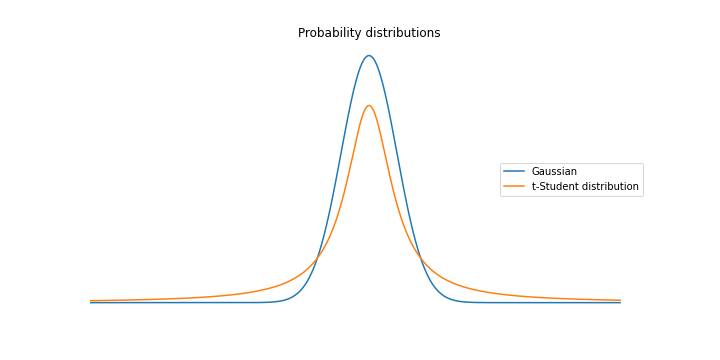

###  Step 3: Optimise the difference between distributions

* The algorithm minimises the difference between the original distributions $p_{j|i}$ and their respective low-dimensional versions $q_{j|i}$.
* It uses the Kullback-Liebler divergence (KL) to measure the difference between distributions. 

$$ \mbox{Kullback-Liebler divergence} =  \mbox{Sum \{ }\mbox{original distance}*log(\frac{\mbox{original distance}}{\mbox{new distance}})\mbox{\}} $$

$$ KL (P|Q) = \sum_{i \neq j} p_{ij} log \frac{p_{ij}}{q_{ij}} $$


###  Step 3: Optimise the difference between distributions

* The cost function is defined as the sum of KL-divergence between all neighbour data point pairs, and minimized using **gradient descent**.  

* This cost function is **non-convex**, meaning that it may have a complex landscape, possibly with more than one minima, and therefore the algorithm has **multiple possible solutions**. 

* Not having an unique solution is one of the main drawbacks of t-SNE, as it may generate a different embedding each time it is run.

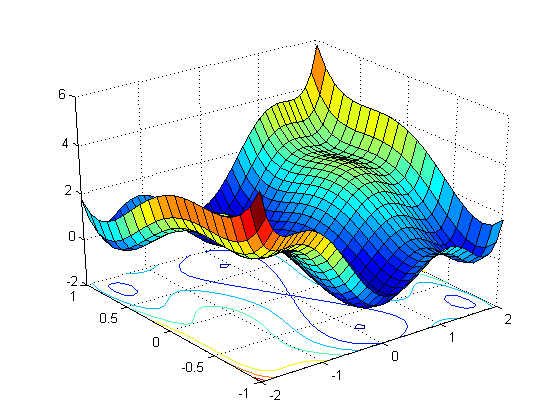

### t-SNE algorithm summary

* **Step 1**: $$ p_{j|i} = \frac{exp(-d(x_{i},x_{j})/(2\sigma^{2}_{i}))}{\sum_{i \neq k} exp(-d(x_{i},x_{k})/(2\sigma^{2}_{i}))} $$
* **Step 2**: $$ q_{j|i} = \frac{(1+||y_{i} - y_{j}||^{2})^{-1}}{\sum_{i \neq k} (1+||y_{i} - y_{j}||^{2})^{-1}} $$
* **Step 3**: $$ KL (P|Q) = \sum_{i \neq j} p_{ij} log \frac{p_{ij}}{q_{ij}} $$


Before diving into the code, let's just review the steps involved with t-SNE. The intuitions are quite simple even if the maths might at times look a bit serious. The overarching idea behind t-SNE is to convert distances between data in the original space to probabilities which we can approximately reproduce in a lower dimensional space.

### Implementation 




In [ ]:
X, y = datasets.make_circles(n_samples=300, factor=.5, noise=.05)

tsne = manifold.TSNE(n_components=2, perplexity=50, init='random', random_state=0)

Y = tsne.fit_transform(X)

In [ ]:
fig, subplots = plt.subplots(1, 2, figsize=(8, 4))

red = y == 0
green = y == 1

ax = subplots[0]
ax.set_title("Original", fontsize=20)
ax.scatter(X[red, 0], X[red, 1], c="orange")
ax.scatter(X[green, 0], X[green, 1], c="royalblue")
ax.axis('off')

ax = subplots[1]
ax.set_title("Perplexity=%d" % 50, fontsize=20)
ax.scatter(Y[red, 0], Y[red, 1], c="orange")
ax.scatter(Y[green, 0], Y[green, 1], c="royalblue")
ax.axis('off')

plt.show()

While it is important to understand how the algorithm works, mercifully, `sklearn` and other libraries offer efficient implementations, which we will be relying upon.

### Perplexity hyper-parameter

* The perplexity is one of the main hyper-parameters in t-SNE. It determines the variance of the Gaussian distribution fitted around each point in the original space, which controls the number of local neighbours. 

It is directly related to the density and number of samples of the dataset. The more dense or populated our dataset is, the more neighbours we want to consider per sample and therefore we will select a higher perplexity. 

The default perplexity value is $p=30$, but typical values range between $5$ and $50$. 

In [ ]:
def perplexity_example(n_samples, n_components, n_clusters):
    (fig, subplots) = plt.subplots(1, 5, figsize=(20, 5))
    perplexities = [5, 30, 50, 100]

    X, y = datasets.make_blobs(n_samples=n_samples, centers=n_clusters, n_features=2, random_state=0, cluster_std = 0.5)

    red = y == 0
    green = y == 1

    ax = subplots[0]
    ax.set_title("Original" )
    ax.scatter(X[red, 0], X[red, 1], c="orange")
    ax.scatter(X[green, 0], X[green, 1], c="royalblue")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    for i, perplexity in enumerate(perplexities):
            ax = subplots[i + 1]

            t0 = time()
            tsne = manifold.TSNE(n_components=n_components, init='random',
                                 random_state=0, perplexity=perplexity)
            Y = tsne.fit_transform(X)
            t1 = time()
            ax.set_title("Perplexity=%d" % perplexity)
            ax.scatter(Y[red, 0], Y[red, 1], c="orange")
            ax.scatter(Y[green, 0], Y[green, 1], c="royalblue")
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.axis('tight')

    plt.show()


### Perplexity hyper-parameter

* We generate a simple dataset of 2 clusters to see the effect of perplexity values on t-SNE outcomes.
* Too small perplexity finds local structure that doesn't exist in the original data. 
* Too high perplexity misses the original structure.

In [ ]:
perplexity_example(n_samples = 100, n_components = 2, n_clusters = 2)

By running the algorithm with different perplexity values we observe that some of the converged solutions are better than others in terms of cluster separability. 

The usual perplexity range is between 5 and 50, therefore one can test different values among these boundaries and expect similar results. While smaller or greater values can lead to misleading distributions. 

In [ ]:
def clust_size_example(n_samples , n_components , n_clusters):
    (fig, subplots) = plt.subplots(1, 5, figsize=(30, 10))
    perplexities = [5, 30, 50, 100]

    X, y = datasets.make_blobs(n_samples=n_samples, centers=n_clusters, n_features=2, random_state=0, cluster_std = [0.1,0.5])

    red = y == 0
    green = y == 1

    ax = subplots[0]
    ax.set_title("Original" )
    ax.scatter(X[red, 0], X[red, 1], c="orange")
    ax.scatter(X[green, 0], X[green, 1], c="royalblue")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    for i, perplexity in enumerate(perplexities):
        ax = subplots[i + 1]

        t0 = time()
        tsne = manifold.TSNE(n_components=n_components, init='random',
                             random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(X)
        t1 = time()
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[red, 0], Y[red, 1], c="orange")
        ax.scatter(Y[green, 0], Y[green, 1], c="royalblue")
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')

    plt.show()

###  Example: Cluster sizes

* Distances in the low dimensional regime do not necessarily represent distances in the original space. 


In [ ]:
clust_size_example(n_samples = 100 , n_components = 2 , n_clusters = 2)

We generate two clusters based on two multivariate Gaussians with different variance. 
In this example we have two clusters with different sizes or densities, generated by a mixture of Gaussians with different variances. 

However, the t-SNE output returns clusters of similar size. This is due to the algorithm being focused on local topology, which doesn't account for relative distances being comparable between clusters.

### Example: Distances between clusters

* For lower perplexities, the algorithm will only have access to the nearest neighbours belonging to the same type, and therefore ignore the relative distance between clusters. 
* Higher perplexity values will account for the global or inter-cluster distances, but  may induce mixing of the clusters.

In [ ]:
def dist_clust_example(n_samples , n_components ):
    (fig, subplots) = plt.subplots(1, 5, figsize=(20, 5))
    perplexities = [5, 30, 50, 100]

    X, y = datasets.make_blobs(n_samples=n_samples, centers=[[1, 1], [1.1, 1.1], [1, -1]], n_features=2, random_state=0,
                               cluster_std = 0.01)

    red = y == 0
    green = y == 1
    blue = y == 2

    ax = subplots[0]
    ax.set_title("Original" )
    ax.scatter(X[red, 0], X[red, 1], c="orange")
    ax.scatter(X[green, 0], X[green, 1], c="royalblue")
    ax.scatter(X[blue, 0], X[blue, 1], c="olive")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    for i, perplexity in enumerate(perplexities):
        ax = subplots[i + 1]

        t0 = time()
        tsne = manifold.TSNE(n_components=n_components, init='random',
                             random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(X)
        t1 = time()
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[red, 0], Y[red, 1], c="orange")
        ax.scatter(Y[green, 0], Y[green, 1], c="royalblue")
        ax.scatter(Y[blue, 0], Y[blue, 1], c="olive")
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')

    plt.show()



In [ ]:
dist_clust_example(n_samples = 100 , n_components = 2 )

We now generate three clusters, with non-equal distances between them.

### Example: Spurious structure from noise

* When t-SNE is applied over very noisy or completely random data, the algorithm may converge to solutions that can be misleading, finding structure where there isn't.

* The nature of the optimisation, combined with local effects, may generate meaningless "clumping" of samples, especially for low perplexity values. 

In [ ]:
def random_noise_example(n_samples , n_components ):
    (fig, subplots) = plt.subplots(1, 5, figsize=(20, 5))
    perplexities = [5, 30, 50, 100]

    X, y = datasets.make_blobs(n_samples=n_samples, centers=1, n_features=2, random_state=0,
                               cluster_std = 1)

    red = y == 0
    green = y == 1
    blue = y == 2

    ax = subplots[0]
    ax.set_title("Original" )
    ax.scatter(X[red, 0], X[red, 1], c="royalblue")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    for i, perplexity in enumerate(perplexities):
        ax = subplots[i + 1]

        t0 = time()
        tsne = manifold.TSNE(n_components=n_components, init='random',
                             random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(X)
        t1 = time()
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[red, 0], Y[red, 1], c="royalblue")
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')

    plt.show()

In [ ]:
random_noise_example(n_samples = 1000, n_components = 2)

We generate a dataset with just one cluster and samples distributed following a multivariate Gaussian.

For lower perplexity values sometimes we will observe the formation of small cluster-like groups or "clumping". This is due to the effect of local distances, and they are usually meaningless. 

In [ ]:
def topology_example_0(n_samples , n_components ):
    (fig, subplots) = plt.subplots(1, 6, figsize=(15, 5))
    perplexities = [5, 10, 30, 50, 100]

    X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.01)

    red = y == 0
    green = y == 1

    ax = subplots[0]
    ax.set_title("Original" )
    ax.scatter(X[red, 0], X[red, 1], c="orange")
    ax.scatter(X[green, 0], X[green, 1], c="royalblue")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    for i, perplexity in enumerate(perplexities):
        ax = subplots[i + 1]

        t0 = time()
        tsne = manifold.TSNE(n_components=n_components, init='random',
                             random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(X)
        t1 = time()
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[red, 0], Y[red, 1], c="orange")
        ax.scatter(Y[green, 0], Y[green, 1], c="royalblue")
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')

    plt.show()

### Topological distributions: circles

* The topological distribution, or global geometry, is often the relevant property we want to preserve. 
* It is recommended to compare t-SNE embeddings for different perplexity.

In [ ]:
topology_example_0(n_samples = 300 , n_components = 2)

The topological distribution, or global geometry, is often the relevant property we want to preserve. 

For instance, we can consider an example where one of the two classes or clusters is contained inside the other. In this example we now generate two clusters with a radial separation.

In order to detect and portray such property in the t-SNE distribution, one needs to experiment and try different perplexity values. 

### Topological distributions:  uniform grid

In [ ]:
def run_uniform_grid(n_samples, n_components):
    # Another example using a 2D uniform grid
    perplexities = [5, 30, 50, 100]
    x = np.linspace(0, 1, int(np.sqrt(n_samples)))
    xx, yy = np.meshgrid(x, x)
    X = np.hstack([
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ])
    color = xx.ravel()

    (fig, subplots) = plt.subplots(1, 5, figsize=(15, 5))

    ax = subplots[0]
    ax.set_title("Original",fontsize=10)
    ax.scatter(X[:, 0], X[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())

    for i, perplexity in enumerate(perplexities):
        ax = subplots[i + 1]

        t0 = time()
        tsne = manifold.TSNE(n_components=n_components, init='random',
                             random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(X)
        t1 = time()

        ax.set_title("Perplexity=%d" % perplexity, fontsize=10)
        ax.scatter(Y[:, 0], Y[:, 1], c=color)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')

    plt.show()

In [ ]:
run_uniform_grid(n_samples=300, n_components=2)

This example of a uniform grid gives a good idea of the way the t-SNE algorithm proceeds. Since it is based on local distances among samples, the final global distribution doesn't necessarily agree in all aspects with the original one.

In this case, the different t-SNE embeddings capture the relative position among samples, but are not able to preserve the constant distances between them, as they are learned from local perspectives. 

### Topological distributions: Knot

In [ ]:
def plot_knot(n_samples):
    phi = linspace(0,2*pi,n_samples)
    x = sin(phi)+2*sin(2*phi)
    y = cos(phi)-2*cos(2*phi)

    X=np.array([x,y])


    s=abs(((y+3)+2)*10)
    plt.scatter(x,y,c=x,s=s,edgecolor='w',cmap=cm.viridis)
    plt.show()

In [ ]:
plot_knot(n_samples=100)

In [ ]:
def topology_example_knot(n_samples, n_components):

    (fig, subplots) = plt.subplots(1, 6, figsize=(30, 10))
    perplexities = [5, 10, 30, 50, 100]

    ax = subplots[0]
    ax.set_title("Original" )
    phi = linspace(0,2*pi,n_samples)
    x = sin(phi)+2*sin(2*phi)
    y = cos(phi)-2*cos(2*phi)
    X=np.array([x,y])
    s=abs(((y+3)+2)*10)

    ax.scatter(x,y,c=x,s=s,edgecolor='w',cmap=cm.viridis)

    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    for i, perplexity in enumerate(perplexities):
        ax = subplots[i + 1]

        t0 = time()
        tsne = manifold.TSNE(n_components=n_components, init='random',
                                 random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(X.T)
        t1 = time()
        ax.set_title("Perplexity=%d" % perplexity)
        s=abs(((y+3)+2)*10)
        ax.scatter(Y[:, 0],Y[:, 1],c=Y[:, 0],s=s,edgecolor='w',cmap=cm.viridis)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')

    plt.show()

In [ ]:
topology_example_knot(n_samples = 1000, n_components = 2)

This is a non-Euclidean topology example. We want to test if t-SNE is able to generate an embedding that preserves the geometry in the low dimensional regime. 

For a very specific perplexity range, t-SNE is able to generate an embedding that preserves the original topology with relative accuracy.

Low values of perplexity can't capture the global geometry, while very big accuracies miss the local relations and therefore end with a random distribution. 

### t-SNE Summary

* t-SNE is a nonlinear dimensionality reduction method, that:
    * uses the local relationships between points to create a low-dimensional mapping.
    * creates probability distributions that define the relationships between the neighbouring points. 
    * preserves the local topology of the data.

### Jupyter Exercise

#### Applying t-SNE to Handwritten Digits

Open `tsne-digits.ipynb`

### Jupyter Exercise

Working with t-SNE and RNA Sequences

Open `tsne-single-cell.ipynb`